In [18]:
import pandas as pd 
from matplotlib import pyplot as plt
import numpy as np 
%matplotlib inline

In [19]:
df = pd.read_csv("churn.csv")

df.drop("state", axis=1, inplace=True)
df.drop("phone number", axis=1, inplace=True)

df.head()

,account length,area code,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,128,415,no,yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,107,415,no,yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,137,415,no,no,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,84,408,yes,no,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,75,415,yes,no,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


In [20]:
df.dtypes

account length              int64
area code                   int64
international plan         object
voice mail plan            object
number vmail messages       int64
total day minutes         float64
total day calls             int64
total day charge          float64
total eve minutes         float64
total eve calls             int64
total eve charge          float64
total night minutes       float64
total night calls           int64
total night charge        float64
total intl minutes        float64
total intl calls            int64
total intl charge         float64
customer service calls      int64
churn                        bool
dtype: object

In [21]:
df.isnull().sum()

account length            0
area code                 0
international plan        0
voice mail plan           0
number vmail messages     0
total day minutes         0
total day calls           0
total day charge          0
total eve minutes         0
total eve calls           0
total eve charge          0
total night minutes       0
total night calls         0
total night charge        0
total intl minutes        0
total intl calls          0
total intl charge         0
customer service calls    0
churn                     0
dtype: int64

In [22]:
df.shape

(3333, 19)

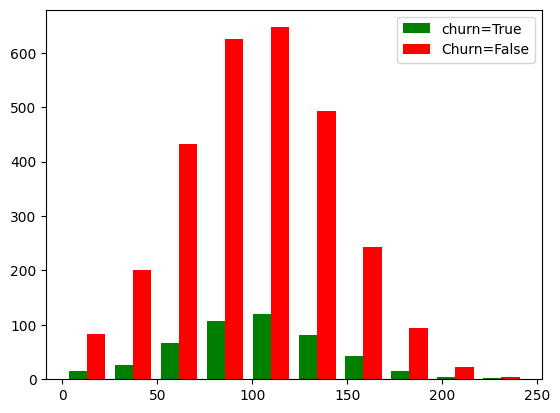

In [23]:
tenure_churn_no = df[df["churn"] == False]["account length"]
tenure_churn_yes = df[df["churn"] == True]["account length"]

plt.hist([tenure_churn_yes, tenure_churn_no], color= ["green", "red"], label=["churn=True", "Churn=False"])
plt.legend()

In [24]:
def print_unique_values(df):
    for column in df:
        if df[column].dtypes == "object":
            print(f"{column} : {df[column].unique()}")
            

In [25]:
print_unique_values(df)

international plan : ['no' 'yes']
voice mail plan : ['yes' 'no']


In [26]:
df.replace("no" ,0, inplace=True )
df.replace("yes", 1, inplace=True)

C:\Users\Ozan\AppData\Local\Temp\ipykernel_7452\1404077544.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df.replace("yes", 1, inplace=True)


In [27]:
print_unique_values(df)

In [28]:
cols_to_scale = ["account length"]

from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
df[cols_to_scale] = scaler.fit_transform(df[cols_to_scale])


In [29]:
df.sample(2)

,account length,area code,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
3258,0.607438,408,0,0,0,243.0,115,41.31,191.8,91,16.30,117.8,93,5.30,13.4,5,3.62,2,False
1139,0.520661,510,0,0,0,220.2,108,37.43,188.4,124,16.01,172.7,113,7.77,11.7,3,3.16,2,False


In [30]:
from sklearn.model_selection import train_test_split

X = df.drop("churn", axis="columns")
y = df["churn"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=5)


In [31]:
len(X_train.columns)

18

In [33]:
import tensorflow as tf
from tensorflow import keras

model = keras.Sequential([
    keras.layers.Dense(20, input_shape=(18,), activation='relu'),
    keras.layers.Dense(1, activation='sigmoid')
])

model.compile(optimizer='adam',
              loss="binary_crossentropy",
              metrics=['accuracy'])

X_train = np.asarray(X_train).astype(np.float32)
y_train = np.asarray(y_train).astype(np.float32)

model.fit(X_train, y_train, epochs=100)

Epoch 1/100


84/84 [==============================] - 1s 1ms/step - loss: 6.2329 - accuracy: 0.7457
Epoch 2/100
84/84 [==============================] - 0s 1ms/step - loss: 3.2381 - accuracy: 0.7506
Epoch 3/100
84/84 [==============================] - 0s 1ms/step - loss: 2.1521 - accuracy: 0.7551
Epoch 4/100
84/84 [==============================] - 0s 891us/step - loss: 1.5964 - accuracy: 0.7686
Epoch 5/100
84/84 [==============================] - 0s 848us/step - loss: 1.1773 - accuracy: 0.7787
Epoch 6/100
84/84 [==============================] - 0s 846us/step - loss: 0.7841 - accuracy: 0.7967
Epoch 7/100
84/84 [==============================] - 0s 881us/step - loss: 0.5569 - accuracy: 0.8181
Epoch 8/100
84/84 [==============================] - 0s 832us/step - loss: 0.4998 - accuracy: 0.8222
Epoch 9/100
84/84 [==============================] - 0s 877us/step - loss: 0.4247 - accuracy: 0.8451
Epoch 10/100
84/84 [==============================] - 0s 878us/step - loss: 0.4377 - accuracy: 

In [34]:
X_test =np.asarray(X_test).astype(np.float32)
y_test =np.asarray(y_test).astype(np.float32)

print(model.evaluate(X_test, y_test))

21/21 [==============================] - 0s 856us/step - loss: 0.2661 - accuracy: 0.8891
[0.2660980820655823, 0.8890554904937744]


In [35]:
yp = model.predict(X_test)
yp[:5]

21/21 [==============================] - 0s 1ms/step


array([[0.04852893],
       [0.08177862],
       [0.01260191],
       [0.03052112],
       [0.01560137]], dtype=float32)

In [36]:
y_test[:19]

array([0., 0., 0., 0., 0., 1., 1., 1., 0., 0., 1., 0., 1., 0., 1., 0., 0.,
       0., 0.], dtype=float32)

In [37]:
y_pred = []
for element in yp:
    if element > 0.5:
        y_pred.append(1)
    else:
        y_pred.append(0)

In [38]:
y_pred[:10]

[0, 0, 0, 0, 0, 1, 1, 1, 0, 0]

In [39]:
from sklearn.metrics import confusion_matrix, classification_report, f1_score

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.93      0.94      0.94       575
         1.0       0.60      0.59      0.59        92

    accuracy                           0.89       667
   macro avg       0.77      0.76      0.76       667
weighted avg       0.89      0.89      0.89       667

